In [15]:
from src.model.classifier import ImageClassifier
from src.model.architectures.visual_transformer import VisionTransformer
import matplotlib.pyplot as plt
import numpy as np
import torch
from src.data.datamodules import ImageNet100DataModule, CIFAR10DataModule

from src.data.transform import Patchify
from torchvision import transforms


inference_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.24703223, 0.24348513, 0.26158784]),
                                     Patchify((4, 4)),
                                     ])
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomResizedCrop((32,32),scale=(0.8,1.0),ratio=(0.9,1.1)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.24703223, 0.24348513, 0.26158784]),
                                      Patchify((4, 4)),
                                     ])

datamodule = CIFAR10DataModule(
        train_batch_size=128,
        val_batch_size=128,
        train_transform=train_transform, 
        inference_transform=inference_transform
    )
datamodule.setup('fit')
sample = torch.unsqueeze(datamodule.val_ds[0]['image'], 0)
sample.shape

Files already downloaded and verified
Files already downloaded and verified


Global seed set to 42
Global seed set to 42


torch.Size([1, 64, 48])

In [2]:
m = VisionTransformer(
        emb_dim=256, 
        flatten_patch_dim=4*4*3, 
        num_blocks=6, 
        num_heads=8, 
        num_patches=64, 
        num_classes=10, 
        dim_feedforward=512,
        dropout=0.2,
        )

In [3]:
mock_facktory = lambda x: x
classifier = ImageClassifier.load_from_checkpoint(model=m, optimizer_factory=mock_facktory, num_classes=10, checkpoint_path="/home/piotr/github/vision-transformer/logs/lightning_logs/version_0/checkpoints/epoch=99-step=35200.ckpt")
classifier.eval()

ImageClassifier(
  (model): VisionTransformer(
    (linear_projection): Linear(in_features=48, out_features=256, bias=True)
    (pos_encoding): PositionalEncoding()
    (class_token): ClassToken()
    (transformer_encoder): TransformerEncoder(
      (encode): Sequential(
        (0): EncoderBlock(
          (attn): MultiHeadAttention(
            (q_transform): ModuleList(
              (0-7): 8 x Linear(in_features=32, out_features=32, bias=False)
            )
            (k_transform): ModuleList(
              (0-7): 8 x Linear(in_features=32, out_features=32, bias=False)
            )
            (v_transform): ModuleList(
              (0-7): 8 x Linear(in_features=32, out_features=32, bias=False)
            )
            (scaled_attention): ScaledDotProductAttention()
            (linear_projection): Linear(in_features=256, out_features=256, bias=True)
          )
          (feedforward): Sequential(
            (0): Linear(in_features=256, out_features=512, bias=True)
        

In [4]:
trained_vit = classifier.model

In [19]:
attention = trained_vit.get_attention(sample.to('cuda')).detach().cpu().numpy()

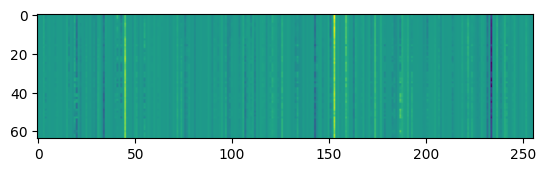

In [20]:
plt.imshow(attention[0, 1:, :])

In [21]:
plt.imshow(pos_encoding[0, :, :].T)

NameError: name 'pos_encoding' is not defined